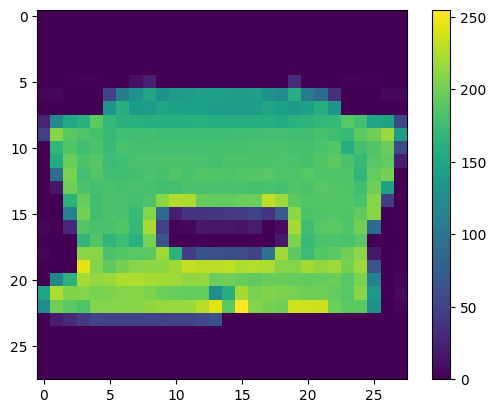

In [36]:
import numpy as np

import matplotlib.pyplot as plt

import keras

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils

# separate for test and train

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot ']

plt.figure()
plt.imshow(x_train[999])
plt.colorbar()
plt.grid(False)

In [37]:
x_train = x_train / 255
x_test = x_test / 255

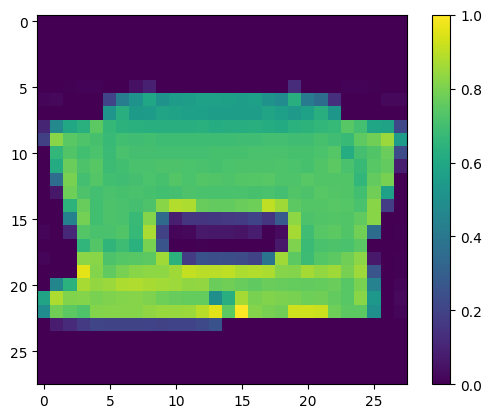

In [38]:
plt.figure()
plt.imshow(x_train[999])
plt.colorbar()
plt.grid(False)

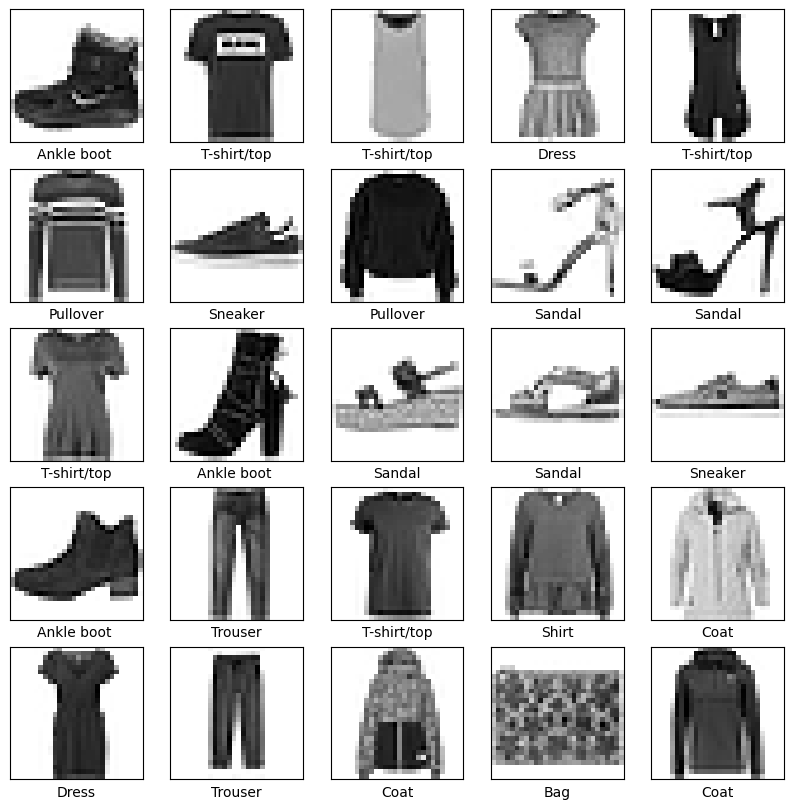

In [39]:
plt.figure(figsize=(10,10))

for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [40]:
# create neuron

model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128,activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [41]:
# compile model

model.compile(optimizer=keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# training model

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 549us/step - loss: 0.7314 - accuracy: 0.7629
Epoch 2/10
1875/1875 [==============================] - 1s 532us/step - loss: 0.5128 - accuracy: 0.8253
Epoch 3/10
1875/1875 [==============================] - 1s 538us/step - loss: 0.4682 - accuracy: 0.8379
Epoch 4/10
1875/1875 [==============================] - 1s 536us/step - loss: 0.4433 - accuracy: 0.8461
Epoch 5/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.4252 - accuracy: 0.8530
Epoch 6/10
1875/1875 [==============================] - 1s 515us/step - loss: 0.4113 - accuracy: 0.8577
Epoch 7/10
1875/1875 [==============================] - 1s 509us/step - loss: 0.3995 - accuracy: 0.8603
Epoch 8/10
1875/1875 [==============================] - 1s 511us/step - loss: 0.3897 - accuracy: 0.8636
Epoch 9/10
1875/1875 [==============================] - 1s 521us/step - loss: 0.3807 - accuracy: 0.8670
Epoch 10/10
1875/1875 [==============================] - 1s 513u

In [44]:
# check quality

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy: ", test_acc)

313/313 [==============================] - 0s 391us/step - loss: 0.4128 - accuracy: 0.8567
Test accuracy:  0.8567000031471252


In [45]:
#predictions

predictions = model.predict(x_train)

predictions[0]

1875/1875 [==============================] - 1s 343us/step


array([1.8742989e-08, 1.2779848e-09, 5.0927524e-09, 2.1863962e-09,
       1.9551312e-09, 2.3006900e-04, 3.0744246e-07, 1.7392018e-03,
       4.6185301e-05, 9.9798417e-01], dtype=float32)

In [46]:
np.argmax(predictions[0])

9

y_train[0]

In [47]:
y_train[0]

9

In [48]:
y_train[12]

5

In [49]:
np.argmax(predictions[12])

5

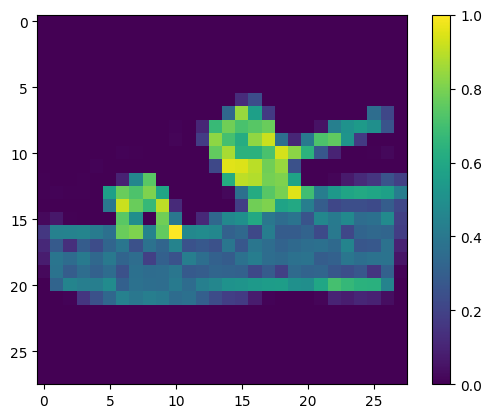

In [50]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)

In [51]:
class_names[5]

'Sandal'